In [1]:
import pandas as pd
import numpy as np
import sys, os
import matplotlib
import matplotlib.pyplot as plt
import pymap3d
import astropy
# ceļu norādīt nevajag, ja pakotne ir instalēta
documentpath=os.getcwd()
libpath=os.path.abspath(os.path.join(documentpath, os.pardir))
sys.path.append(libpath)
from sudrabainiemakoni.cloudimage import CloudImage
from sudrabainiemakoni.cloudimage import WebMercatorImage
from sudrabainiemakoni import plots
from sudrabainiemakoni import geoutils
import geoutils
matplotlib.rcParams.update({'font.size': 20})

In [29]:
# katalogs ar piemēra failiem
sample_directory = 'SampleData'
# katalogs ar rezultātu failiem
results_directory = 'SampleResults'
# pirmais attēls
case1 = 'js_202106210100'
case1 = 'js_202207100100'


In [30]:
cldim = CloudImage.load(f'{results_directory}/{case1}.proj')

In [31]:
height_km = 80

In [32]:
webmerc=WebMercatorImage(cldim, 15,35,57,63,1)

In [33]:
webmerc.prepare_reproject_from_camera(height_km)

Loading image: js_202207100100.jpg


In [34]:
projected_image_hght=webmerc.Fill_projectedImageMasked()

In [35]:
def sunlit_cloudimage(cldim, height_km, astropy_date):
    i_grid, j_grid = cldim.imageArrayGrid()
    grid_points=np.array([i_grid.flatten(), j_grid.flatten()]).T
    cam = cldim.camera.camera_ecef
    center, rays = cam.getRay(grid_points, normed=True)
    ray_coords=rays.T
    xyz = geoutils.los_to_earth(*center,*ray_coords, height_km*1000, to_earth=False)
    is_sunlit=geoutils.get_is_sunlit(xyz[0],xyz[1],xyz[2],astropy_date)
    is_sunlit=is_sunlit.reshape(i_grid.shape)
    return is_sunlit

In [36]:
def get_sunlit_grid(webmerc, astropy_date, height):
    lat=webmerc.lat_grid
    lon=webmerc.lon_grid

    sunlit_grid=geoutils.get_is_sunlit_latlon(lat,lon,height,astropy_date)
    return sunlit_grid

In [37]:
sunlit_grid = get_sunlit_grid(webmerc, cldim.date, height_km*1000.0)

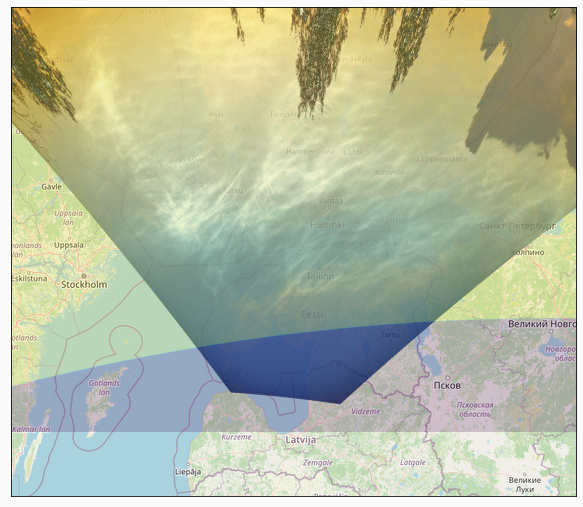

In [38]:
map_lonmin, map_lonmax, map_latmin, map_latmax = 16,32,56,63
plots.PlotReferencedImages(webmerc, [projected_image_hght, sunlit_grid],  
                               outputFileName=None,
                               lonmin=map_lonmin, lonmax=map_lonmax, latmin=map_latmin, latmax=map_latmax,
                               showplot=True,
                               alpha=[0.8,0.2])

In [ ]:
sunlit1=sunlit_cloudimage(cldim, height_km, cldim.date)

In [17]:
t_j = np.argmax(sunlit1, axis=0)
sun_line=(np.arange(sunlit1.shape[1]),t_j)

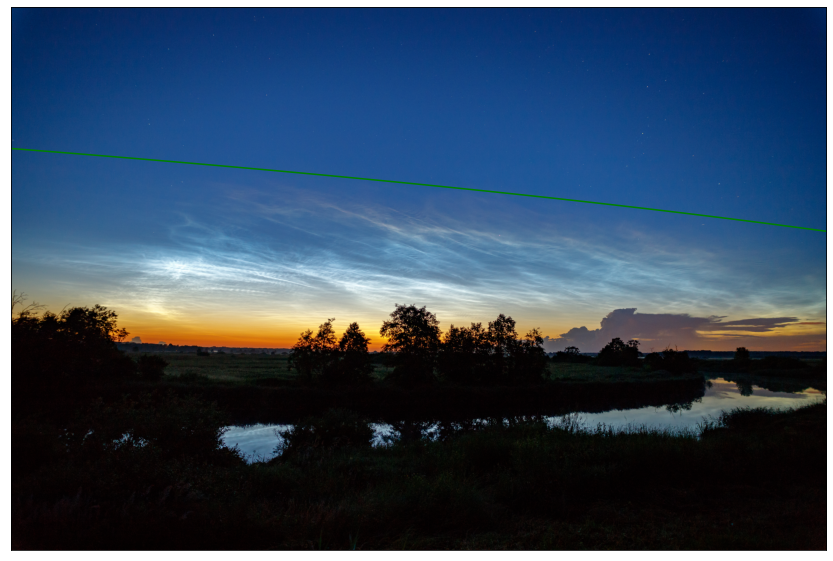

In [18]:
arrowprops=dict(arrowstyle='->', color='black', linewidth=2)
fig, ax=plt.subplots(figsize=(20,10))
ax.imshow(cldim.imagearray)
ax.plot(sun_line[0], sun_line[1], color='green')
ax.set_xticks([])
ax.set_yticks([])
plt.show()